In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("deep")
from warnings import filterwarnings
filterwarnings("ignore")
import scipy.stats as stats
import statsmodels.stats.weightstats as statsmod

# Problem 1 Wholesale Customers Analysis

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail)

In [2]:
CustomerData = pd.read_csv("Wholesale+Customers+Data.csv")
CustomerData.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [3]:
CustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [4]:
CustomerData.describe(include='all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440,440,440.00,440.00,440.00,440.00,440.00,440.00
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.50,NaN,NaN,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,127.16,NaN,NaN,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,1.00,NaN,NaN,3.00,55.00,3.00,25.00,3.00,3.00
25%,110.75,NaN,NaN,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,220.50,NaN,NaN,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,330.25,NaN,NaN,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25


In [5]:
CustomerData['Total_Spent'] = CustomerData['Fresh'] + CustomerData['Milk'] + CustomerData['Grocery'] \
                              + CustomerData['Frozen'] + CustomerData['Detergents_Paper'] + CustomerData['Delicatessen']
CustomerData.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Spent
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


## 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

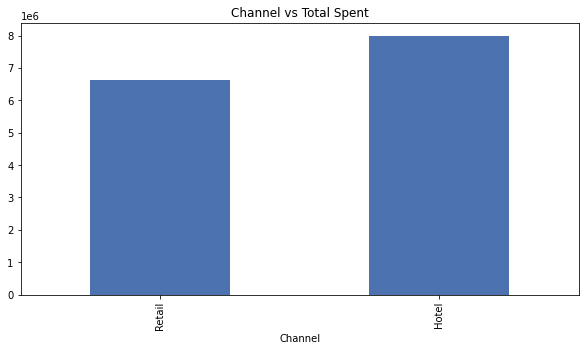

In [6]:
plt.figure(figsize=(10,5))
CustomerData.groupby('Channel').sum()['Total_Spent'].sort_values(ascending = True).plot(kind = 'bar')
plt.title('Channel vs Total Spent')
plt.show()

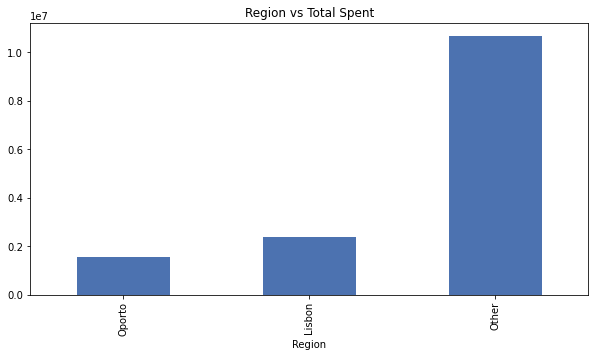

In [7]:
plt.figure(figsize=(10,5))
CustomerData.groupby('Region').sum()['Total_Spent'].sort_values(ascending = True).plot(kind = 'bar')
plt.title('Region vs Total Spent')
plt.show()

##### From Bar plot we can see that Hotel(Channel) and other(Region) spent the most on the other hand Retail(Channel) and Oporto(Region) spent less.

## 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

<Figure size 720x1080 with 0 Axes>

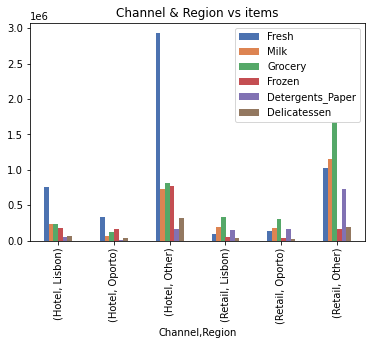

In [8]:
plt.figure(figsize=(10,15))
CustomerData.groupby(['Channel','Region']).sum()[['Fresh', 'Milk', 'Grocery','Frozen', 'Detergents_Paper', 'Delicatessen']].plot(kind = 'bar')
plt.title('Channel & Region vs items')
plt.show()

In [9]:
FreshProduct = CustomerData.groupby(['Region','Channel'])['Fresh']
FreshProduct_des = FreshProduct.describe().T
FreshProduct_des.loc[('CV'), :] = FreshProduct_des.loc[('std'), :]/FreshProduct_des.loc[('mean'), :]
FreshProduct_des

Region    Lisbon            Oporto              Other         
Channel    Hotel   Retail    Hotel   Retail     Hotel   Retail
count      59.00    18.00    28.00    19.00    211.00   105.00
mean    12902.25  5200.00 11650.54  7289.79  13878.05  9831.50
std     12342.01  5415.52  8969.36  6867.93  14746.57  9635.39
min       514.00    18.00     3.00   161.00      3.00    23.00
25%      4437.50  2378.25  4938.25  2368.00   3702.50  2343.00
50%      8656.00  2926.00  9787.00  6468.00   9612.00  7362.00
75%     18135.00  5988.00 17031.50  9162.00  18821.00 15076.00
max     56083.00 20782.00 32717.00 27082.00 112151.00 44466.00
CV          0.96     1.04     0.77     0.94      1.06     0.98

In [10]:
MilkProduct = CustomerData.groupby(['Region','Channel'])['Milk']
MilkProduct_des = MilkProduct.describe().T
MilkProduct_des.loc[('CV'), :] = MilkProduct_des.loc[('std'), :]/MilkProduct_des.loc[('mean'), :]
MilkProduct_des

Region    Lisbon            Oporto             Other         
Channel    Hotel   Retail    Hotel   Retail    Hotel   Retail
count      59.00    18.00    28.00    19.00   211.00   105.00
mean     3870.20 10784.00  2304.25  9190.79  3486.98 10981.01
std      4298.32  6609.22  2968.63  6611.35  4508.51 10574.83
min       258.00  2527.00   333.00   928.00    55.00  1124.00
25%      1071.00  6253.25  1146.00  4148.50  1188.50  6128.00
50%      2280.00  8866.00  1560.50  6817.00  2247.00  7845.00
75%      4995.50 13112.25  2344.75 13127.50  4205.00 11114.00
max     23527.00 28326.00 16784.00 25071.00 43950.00 73498.00
CV          1.11     0.61     1.29     0.72     1.29     0.96

In [11]:
GroceryProduct = CustomerData.groupby(['Region','Channel'])['Grocery']
GroceryProduct_des = GroceryProduct.describe().T
GroceryProduct_des.loc[('CV'), :] = GroceryProduct_des.loc[('std'), :]/GroceryProduct_des.loc[('mean'), :]
GroceryProduct_des

Region    Lisbon            Oporto             Other         
Channel    Hotel   Retail    Hotel   Retail    Hotel   Retail
count      59.00    18.00    28.00    19.00   211.00   105.00
mean     4026.14 18471.94  4395.50 16326.32  3886.73 15953.81
std      3629.64 10414.69  3048.30 14035.45  3593.51 12298.94
min       489.00  5265.00  1330.00  2743.00     3.00  4523.00
25%      1620.00 10634.25  2373.75  9318.50  1666.00  9170.00
50%      2576.00 16106.00  3352.00 12469.00  2642.00 12121.00
75%      5172.50 23478.75  5527.50 19785.50  4927.50 19805.00
max     16966.00 39694.00 13626.00 67298.00 21042.00 92780.00
CV          0.90     0.56     0.69     0.86     0.92     0.77

In [12]:
FrozenProduct = CustomerData.groupby(['Region','Channel'])['Frozen']
FrozenProduct_des = FrozenProduct.describe().T
FrozenProduct_des.loc[('CV'), :] = FrozenProduct_des.loc[('std'), :]/FrozenProduct_des.loc[('mean'), :]
FrozenProduct_des

Region    Lisbon           Oporto             Other        
Channel    Hotel  Retail    Hotel   Retail    Hotel  Retail
count      59.00   18.00    28.00    19.00   211.00  105.00
mean     3127.32 2584.11  5745.04  1540.58  3656.90 1513.20
std      3276.46 2424.77 11454.48  2473.27  4956.59 1504.50
min        91.00   61.00   264.00   131.00    25.00   33.00
25%       966.00  923.50   962.25   639.50   779.00  437.00
50%      1859.00 1522.00  2696.50   934.00  1960.00 1059.00
75%      4479.00 3843.00  4617.00  1410.00  4542.50 2194.00
max     18711.00 8321.00 60869.00 11559.00 36534.00 8132.00
CV          1.05    0.94     1.99     1.61     1.36    0.99

In [13]:
Detergents_PaperProduct = CustomerData.groupby(['Region','Channel'])['Detergents_Paper']
Detergents_PaperProduct_des = Detergents_PaperProduct.describe().T
Detergents_PaperProduct_des.loc[('CV'), :] = Detergents_PaperProduct_des.loc[('std'), :]/Detergents_PaperProduct_des.loc[('mean'), :]
Detergents_PaperProduct_des

Region   Lisbon           Oporto            Other         
Channel   Hotel   Retail   Hotel   Retail   Hotel   Retail
count     59.00    18.00   28.00    19.00  211.00   105.00
mean     950.53  8225.28  482.71  8410.26  786.68  6899.24
std     1305.91  5515.88  425.31  8286.75 1099.97  6022.09
min        5.00   788.00   15.00   332.00    3.00   523.00
25%      237.00  4818.25  182.75  3900.00  176.50  3537.00
50%      412.00  6177.00  325.00  6236.00  375.00  5121.00
75%      874.00 11804.75  707.00  9837.50  948.50  7677.00
max     5828.00 19410.00 1679.00 38102.00 6907.00 40827.00
CV         1.37     0.67    0.88     0.99    1.40     0.87

In [14]:
DelicatessenProduct = CustomerData.groupby(['Region','Channel'])['Delicatessen']
DelicatessenProduct_des = DelicatessenProduct.describe().T
DelicatessenProduct_des.loc[('CV'), :] = DelicatessenProduct_des.loc[('std'), :]/DelicatessenProduct_des.loc[('mean'), :]
DelicatessenProduct_des

Region   Lisbon          Oporto            Other         
Channel   Hotel  Retail   Hotel  Retail    Hotel   Retail
count     59.00   18.00   28.00   19.00   211.00   105.00
mean    1197.15 1871.94 1105.89 1239.00  1518.28  1826.21
std     1219.95 1626.49 1056.78 1065.44  3663.18  2119.05
min        7.00  120.00   51.00   59.00     3.00     3.00
25%      374.00  746.00  567.25  392.50   378.50   545.00
50%      749.00 1414.00  883.00 1037.00   823.00  1386.00
75%     1621.50 2456.50 1146.00 1815.00  1582.00  2158.00
max     6854.00 6372.00 5609.00 3508.00 47943.00 16523.00
CV         1.02    0.87    0.96    0.86     2.41     1.16

## 1.3 On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour? Which items shows the least inconsistent behaviour?

In [15]:
tempData = CustomerData[['Fresh', 'Milk', 'Grocery','Frozen', 'Detergents_Paper', 'Delicatessen']].describe()
tempData.loc[('CV'), :] = tempData.loc[('std'), :]/tempData.loc[('mean'), :]
tempData

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440.00,440.00,440.00,440.00,440.00
mean,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,3.00,55.00,3.00,25.00,3.00,3.00
25%,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00
CV,1.05,1.27,1.20,1.58,1.65,1.85


In [16]:
print('coefficient varience of Items:\n',tempData.loc[('CV'),:].sort_values(ascending = True))

coefficient varience of Items:
 Fresh              1.05
Grocery            1.20
Milk               1.27
Frozen             1.58
Detergents_Paper   1.65
Delicatessen       1.85
Name: CV, dtype: float64


## 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

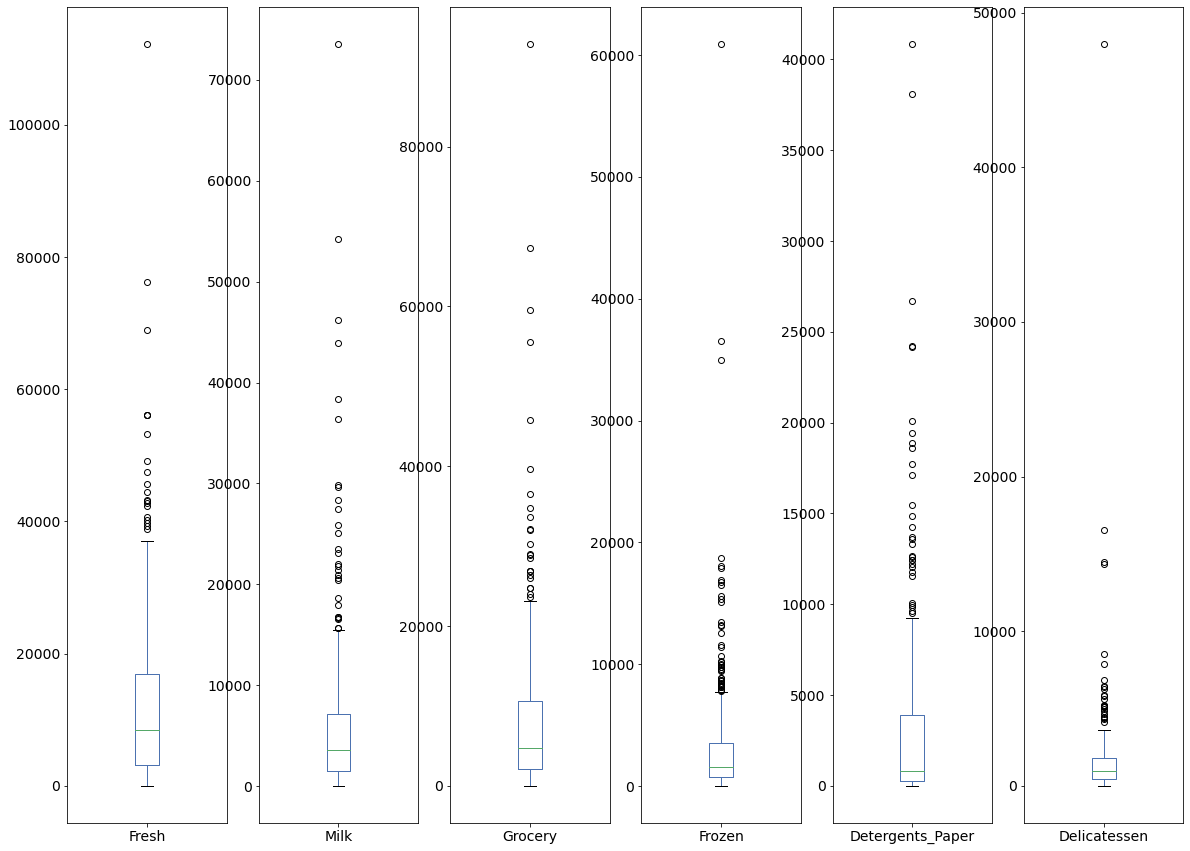

In [17]:
plt.figure(figsize=(20,15))
plt.subplot(1,6,1)
CustomerData['Fresh'].plot(kind = 'box',fontsize = 14)
plt.subplot(1,6,2)
CustomerData['Milk'].plot(kind = 'box',fontsize = 14)
plt.subplot(1,6,3)
CustomerData['Grocery'].plot(kind = 'box',fontsize = 14)
plt.subplot(1,6,4)
CustomerData['Frozen'].plot(kind = 'box',fontsize = 14)
plt.subplot(1,6,5)
CustomerData['Detergents_Paper'].plot(kind = 'box',fontsize = 14)
plt.subplot(1,6,6)
CustomerData['Delicatessen'].plot(kind = 'box',fontsize = 14)
plt.show()

## 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective.

From the data exploration, we can recommend below suggestions to the wholesale distributor:
1.	Hotels and retailers spent less in frozen and delicatessen products across all region as we can see from the box plot and bar plot. Distributer need to explore more to increase the selling of these products.
2.	Distributer need to reserve very high stock for Fresh product as we can see from channel & region vs items bar chart and descriptive measure of variability. 

# Problem 2
The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

In [18]:
StudentData = pd.read_csv('Survey-1.csv')
StudentData.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.90,Full-Time,50.00,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.60,Part-Time,25.00,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.50,Part-Time,45.00,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.50,Full-Time,40.00,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.80,Unemployed,40.00,2,4,500,Laptop,100


In [19]:
StudentData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


## 2.1 For this data, construct the following contingency tables (Keep Gender as row variable)

### 2.1.1. Gender and Major
### 2.1.2. Gender and Grad Intention
### 2.1.3. Gender and Employment
### 2.1.4. Gender and Computer

In [20]:
pd.crosstab(StudentData['Gender'],StudentData['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [21]:
pd.crosstab(StudentData['Gender'],StudentData['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [22]:
pd.crosstab(StudentData['Gender'],StudentData['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [23]:
pd.crosstab(StudentData['Gender'],StudentData['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


## 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.2.1. What is the probability that a randomly selected CMSU student will be male?
### 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [24]:
StudentData['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [25]:
print('probability that a randomly selected CMSU student will be male:',29/len(StudentData['Gender']))

probability that a randomly selected CMSU student will be male: 0.46774193548387094


In [26]:
print('probability that a randomly selected CMSU student will be male:',33/len(StudentData['Gender']))

probability that a randomly selected CMSU student will be male: 0.532258064516129


## 2.3. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

### 2.3.1.	Find the conditional probability of different majors among the male students in CMSU.
### 2.3.2.	Find the conditional probability of different majors among the female students of CMSU.


In [27]:
pd.crosstab(StudentData['Gender'],StudentData['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [28]:
StudentData['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [29]:
print('Probability of Accounting among the Male students in CMSU:',4/29)
print('Probability of CIS among the Male students in CMSU:',1/29)
print('Probability of Economics/Finance among the Male students in CMSU:',4/29)
print('Probability of International Business among the Male students in CMSU:',2/29)
print('Probability of Management among the Male students in CMSU:',6/29)
print('Probability of Other among the Male students in CMSU:',4/29)
print('Probability of Retailing/Marketing among the Male students in CMSU:',5/29)
print('Probability of Undecided among the Male students in CMSU:',3/29)

Probability of Accounting among the Male students in CMSU: 0.13793103448275862
Probability of CIS among the Male students in CMSU: 0.034482758620689655
Probability of Economics/Finance among the Male students in CMSU: 0.13793103448275862
Probability of International Business among the Male students in CMSU: 0.06896551724137931
Probability of Management among the Male students in CMSU: 0.20689655172413793
Probability of Other among the Male students in CMSU: 0.13793103448275862
Probability of Retailing/Marketing among the Male students in CMSU: 0.1724137931034483
Probability of Undecided among the Male students in CMSU: 0.10344827586206896


In [30]:
print('Probability of Accounting among the Female students in CMSU:',3/33)
print('Probability of CIS among the Female students in CMSU:',3/33)
print('Probability of Economics/Finance among the Female students in CMSU:',7/33)
print('Probability of International Business among the Female students in CMSU:',4/33)
print('Probability of Management among the Female students in CMSU:',4/33)
print('Probability of Other among the Female students in CMSU:',3/33)
print('Probability of Retailing/Marketing among the Female students in CMSU:',9/33)
print('Probability of Undecided among the Female students in CMSU:',0/33)

Probability of Accounting among the Female students in CMSU: 0.09090909090909091
Probability of CIS among the Female students in CMSU: 0.09090909090909091
Probability of Economics/Finance among the Female students in CMSU: 0.21212121212121213
Probability of International Business among the Female students in CMSU: 0.12121212121212122
Probability of Management among the Female students in CMSU: 0.12121212121212122
Probability of Other among the Female students in CMSU: 0.09090909090909091
Probability of Retailing/Marketing among the Female students in CMSU: 0.2727272727272727
Probability of Undecided among the Female students in CMSU: 0.0


## 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

### 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.
### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [31]:
print('Probability That a randomly chosen student is a male and intends to graduate = P(Grad Intention|male) x P(male) = ',(17/29) * (29/62))

Probability That a randomly chosen student is a male and intends to graduate = P(Grad Intention|male) x P(male) =  0.27419354838709675


In [32]:
print('Probability that a randomly selected student is a female and does NOT have a laptop = P(Not have Laptop|female) x P(female) = ',(4/33) * (33/62))

Probability that a randomly selected student is a female and does NOT have a laptop = P(Not have Laptop|female) x P(female) =  0.06451612903225806


## 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?
### 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [62]:
print('Probability that a randomly chosen student is a male or has full-time employment \
= P(Male) + P(Full time employment) - P(Male|Full time employment) = ',(29/62) + (10/62) - (7/29))

Probability that a randomly chosen student is a male or has full-time employment = P(Male) + P(Full time employment) - P(Male|Full time employment) =  0.16129032258064516


In [61]:
pd.crosstab(StudentData['Gender'],StudentData['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [34]:
print('Probability that given a female student is randomly chosen, she is majoring in international business or management \
= P(International business|Female) + P(Management|Female) = ',(4/33) + (4/33))

Probability that given a female student is randomly chosen, she is majoring in international business or management = P(International business|Female) + P(Management|Female) =  0.24242424242424243


## 2.6. Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [35]:
newStudentData = StudentData.copy().rename(columns={'Major': 'Graduate'})
newStudentData.loc[newStudentData.Graduate != 'Undecided', 'Graduate'] = 'Yes'
newStudentData.loc[newStudentData.Graduate == 'Undecided', 'Graduate'] = 'No'
pd.crosstab(newStudentData['Gender'],newStudentData['Graduate'])

Graduate,No,Yes
Gender,,
Female,0,33
Male,3,26


In [36]:
GradIntentionTable = pd.crosstab(StudentData['Gender'],StudentData['Grad Intention'])
GradIntentionTable.drop(columns='Undecided',inplace=True)
GradIntentionTable

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


For Two event to be independent bellow condition must be true.
P(A ∩ B) = P(A) * P(B)

So, P (Graduate intention ∩ Female) = P(Graduate intention) * P(Female)

In [37]:
print('P(Graduate intention) =', (11+17)/(9+3+11+17) )

P(Graduate intention) = 0.7


In [38]:
print('P(Female) =', (9+11)/(9+3+11+17) )

P(Female) = 0.5


In [39]:
print('P(Graduate intention) * P(Female) =', 0.7 * 0.5 )

P(Graduate intention) * P(Female) = 0.35


In [40]:
print('P (Graduate intention ∩ Female) =', 11/(9+3+11+17) )

P (Graduate intention ∩ Female) = 0.275


This is not independent events as probability multiplication of both events is not equal to combined event, so graduate intention and being female are not independent.

## 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

Answer the following questions based on the data

### 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?
### 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [41]:
newStudentData = StudentData.copy()
newStudentData.loc[newStudentData.GPA < 3.00, 'GPA'] = 1
newStudentData.loc[newStudentData.GPA >= 3.00, 'GPA'] = 0
pd.crosstab(newStudentData['Gender'],newStudentData['GPA'])

GPA,0.00,1.00
Gender,,
Female,25,8
Male,20,9


In [42]:
print('Probability that his/her GPA is less than 3:',8/62 + 9/62)

Probability that his/her GPA is less than 3: 0.27419354838709675


In [43]:
StudentData.columns

Index(['ID', 'Gender', 'Age', 'Class', 'Major', 'Grad Intention', 'GPA',
       'Employment', 'Salary', 'Social Networking', 'Satisfaction', 'Spending',
       'Computer', 'Text Messages'],
      dtype='object')

In [44]:
newStudentData = StudentData.copy()
newStudentData.loc[newStudentData['Salary'] < 50, 'Salary'] = 1
newStudentData.loc[newStudentData['Salary'] >= 50, 'Salary'] = 0
pd.crosstab(newStudentData['Gender'],newStudentData['Salary'])

Salary,0.00,1.00
Gender,,
Female,18,15
Male,14,15


In [45]:
print('Probability that randomly selected male earns 50 or more:',15/62)
print('Probability that randomly selected female earns 50 or more:',15/62)

Probability that randomly selected male earns 50 or more: 0.24193548387096775
Probability that randomly selected female earns 50 or more: 0.24193548387096775


## 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

Skew of GPA:  -0.3069370607018797
Skew of Salary:  0.5216766008645851
Skew of Spending:  1.5472850312929523
Skew of Text Messages:  1.2642446834439687


[]

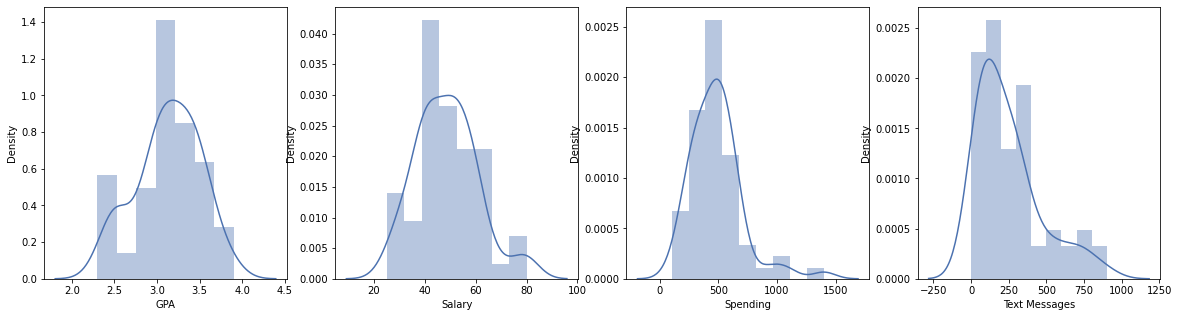

In [46]:
print('Skew of GPA: ', stats.skew(StudentData['GPA']))
print('Skew of Salary: ', stats.skew(StudentData['Salary']))
print('Skew of Spending: ', stats.skew(StudentData['Spending']))
print('Skew of Text Messages: ', stats.skew(StudentData['Text Messages']))
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.distplot(StudentData['GPA'])
plt.subplot(1,4,2)
sns.distplot(StudentData['Salary'])
plt.subplot(1,4,3)
sns.distplot(StudentData['Spending'])
plt.subplot(1,4,4)
sns.distplot(StudentData['Text Messages'])
plt.plot()

In [47]:
tempData = StudentData.describe()
tempData.loc[('CV'), :] = tempData.loc[('std'), :]/tempData.loc[('mean'), :]
tempData

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00
mean,31.50,21.13,3.13,48.55,1.52,3.74,482.02,246.21
std,18.04,1.43,0.38,12.08,0.84,1.21,221.95,214.47
min,1.00,18.00,2.30,25.00,0.00,1.00,100.00,0.00
25%,16.25,20.00,2.90,40.00,1.00,3.00,312.50,100.00
50%,31.50,21.00,3.15,50.00,1.00,4.00,500.00,200.00
75%,46.75,22.00,3.40,55.00,2.00,4.00,600.00,300.00
max,62.00,26.00,3.90,80.00,4.00,6.00,1400.00,900.00
CV,0.57,0.07,0.12,0.25,0.56,0.32,0.46,0.87


# Problem 3

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.
The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

In [48]:
ShinglesData = pd.read_csv('A+&+B+shingles.csv')
ShinglesData.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [49]:
ShinglesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [50]:
AShinglesData = ShinglesData['A'].dropna()
BShinglesData = ShinglesData['B'].dropna()

## 3.1. Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

## Solutions:

Test 1: Mean moister contents in A is greater then 0.35 punds

H0: Mean moister contents in A <= 0.35 pounds \
H1: Mean moister contents in A > 0.35 pounds

In [51]:
dA = statsmod.DescrStatsW(AShinglesData)

In [52]:
tstatA, pvalueA, dfA = dA.ttest_mean(value=0.35, alternative='larger')

In [53]:
print('p-value of A:',pvalueA)
print('tstat of A:',tstatA)

p-value of A: 0.9252236685509249
tstat of A: -1.473504625338278


at the 5% level of significance, we can see p-value of A > 0.05, we do not have enough evidence to prove that the Mean moister contents in A is less then 0.35 punds. Hence, we fail to reject the null hypothesis.

Test 2: Mean moister contents in B is greater then 0.35 punds

H0: Mean moister contents in B <= 0.35 pounds \
H1: Mean moister contents in B > 0.35 pounds

In [54]:
dB = statsmod.DescrStatsW(BShinglesData)

In [55]:
tstatB, pvalueB, dfB = dB.ttest_mean(value=0.35, alternative='larger')

In [56]:
print('p-value of B:',pvalueB)
print('tstat of B:',tstatB)

p-value of B: 0.9979095225996808
tstat of B: -3.1003313069986995


at the 5% level of significance, we can see p-value of B > 0.05, we do not have enough evidence to prove that the Mean moister contents in B is less then 0.35 punds. Hence, we fail to reject the null hypothesis.

## 3.2. Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

### Solution:

H0: Mean moister contents in A = Mean moister contents in B \
H1: Mean moister contents in A != Mean moister contents in B

Assuming Level of significance = 0.05 ,Shingles A and B have equeal varience and are normaly distributed over population.

In [57]:
tstat, pvalue, df = statsmod.ttest_ind(AShinglesData, BShinglesData, usevar='pooled', alternative='two-sided')

In [58]:
print('p-value:',pvalue)
print('t-state:',tstat)

p-value: 0.20174965718353277
t-state: 1.2896282719661123


At  the  level  of  5%  significance,  p-value  =  0.2017.    
Since  p-value  >  0.05,  that  means  the population mean for shingles A and B are equal at the 5% level of significance. We have no evidence to reject the null hypothesis since p value > Level of significance